<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/Fruad_Transaction_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAME: HABEEB SOLALU


##Exercise A

In [ ]:
!gdown --id 1A_EE7CIltvI5YfP_EPzmQ5jeNezT7cfF

Downloading...
From: https://drive.google.com/uc?id=1A_EE7CIltvI5YfP_EPzmQ5jeNezT7cfF
To: /content/transactions.csv
16.1MB [00:00, 141MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/transactions.csv")
print("Dataset Shape: ", df.shape)

df.head()

Dataset Shape:  (200000, 11)


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


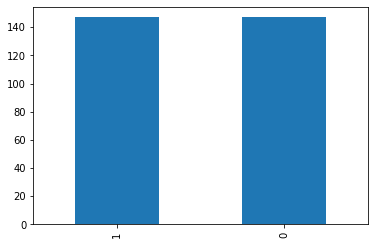

In [ ]:
isFraud_count = len(df[df['isFraud'] == 1])
nonFraud_count = len(df[df['isFraud'] == 0])

sampled_nonFraud = df[df['isFraud'] == 0].sample(n=isFraud_count)
isFraud = df[df['isFraud'] == 1]

sampled_nonFraud.reset_index(drop=True, inplace=True)
isFraud.reset_index(drop=True, inplace=True)

balanced_df = pd.concat([sampled_nonFraud, isFraud]).reset_index(drop=True);

balanced_df['isFraud'].value_counts().plot(kind='bar')

In [ ]:
balanced_df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,169975,12,PAYMENT,579.86,C1606254132,0.00,0.00,M592935517,0.00,0.00,0
1,82958,10,DEBIT,518.30,C154751578,16159.00,15640.70,C1876380981,280102.44,334294.66,0
2,125766,11,CASH_OUT,2786.18,C403116403,339012.52,336226.34,C1009424082,20728.00,23514.18,0
3,155869,12,CASH_OUT,7805.01,C1285085571,0.00,0.00,C1573676608,0.00,7805.01,0
4,181589,12,PAYMENT,2924.50,C512265417,28953.00,26028.50,M685993548,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
289,182862,13,CASH_OUT,408.00,C1894004688,408.00,0.00,C1293978242,898297.85,1075854.14,1
290,193765,13,TRANSFER,48375.02,C920803432,48375.02,0.00,C1767389067,0.00,0.00,1
291,193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.00,C590035788,374803.26,658520.33,1
292,196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.00,C1548348754,0.00,0.00,1


In [ ]:
categories_col= ['step', 'type', 'nameOrig', 'nameDest']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# apply le on categorical feature columns
balanced_df[categories_col] = balanced_df[categories_col].apply(lambda col: le.fit_transform(col))
print(balanced_df)
balanced_df.info()

     Unnamed: 0  step  type  ...  oldbalanceDest  newbalanceDest  isFraud
0        169975    11     3  ...            0.00            0.00        0
1         82958     9     2  ...       280102.44       334294.66        0
2        125766    10     1  ...        20728.00        23514.18        0
3        155869    11     1  ...            0.00         7805.01        0
4        181589    11     3  ...            0.00            0.00        0
..          ...   ...   ...  ...             ...             ...      ...
289      182862    12     1  ...       898297.85      1075854.14        1
290      193765    12     4  ...            0.00            0.00        1
291      193766    12     1  ...       374803.26       658520.33        1
292      196775    12     4  ...            0.00            0.00        1
293      196776    12     1  ...        80136.56      4057191.21        1

[294 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (t

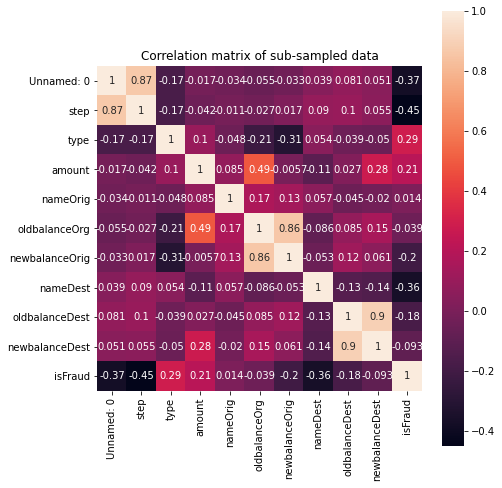

In [ ]:
corr = balanced_df.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True, annot=True)

The strongest correlation occurred between the oldbalanceDest and the newbalanceDest at 0.9 which was then followed the correlation between oldbalanceOrg and newbalanceOrg at 0.86.

In [ ]:
numeric_col = ['amount', 'nameOrig','oldbalanceOrg', 'newbalanceOrig', 'nameDest','oldbalanceDest','newbalanceDest']
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
balanced_df[numeric_col]=min_max.fit_transform(balanced_df[numeric_col])

X = balanced_df.drop('isFraud', axis = 1)
y = balanced_df['isFraud']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

##SUPPORT VECTOR MACHINE(SVM) MODEL

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svclassifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.91      0.70      0.79        30

    accuracy                           0.81        59
   macro avg       0.83      0.82      0.81        59
weighted avg       0.83      0.81      0.81        59



In [ ]:
!pip install -U git+https://github.com/apogiatzis/etherscan_py
!pip install neo4j

  Cloning https://github.com/apogiatzis/etherscan_py to /tmp/pip-req-build-2q_oqf57
  Running command git clone -q https://github.com/apogiatzis/etherscan_py /tmp/pip-req-build-2q_oqf57
  Created wheel for etherscan-py: filename=etherscan_py-0.2.4-py2.py3-none-any.whl size=6578 sha256=cbaaa3449914a9af614c073950b768ab6f19d8b954c8f919233790c0eea13403
  Stored in directory: /tmp/pip-ephem-wheel-cache-3pumw2gq/wheels/35/56/cf/ac7e9d2250b53dec727905714a99f4d5c7b2f613139324aa42
Successfully built etherscan-py
  Found existing installation: etherscan-py 0.2.4
    Uninstalling etherscan-py-0.2.4:
      Successfully uninstalled etherscan-py-0.2.4


In [ ]:
from neo4j import GraphDatabase
# change these to your credentials and url
BOLT_URL = "bolt://3.237.87.62:7687"
USER = "neo4j"
PWD = "sir-lengths-hotel"

class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, parameters=None, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response


conn = Neo4jConnection(uri=BOLT_URL, user=USER, pwd=PWD)

In [ ]:
conn.query('CREATE CONSTRAINT transactions IF NOT EXISTS ON (t:Transaction) ASSERT t.hash IS UNIQUE')
conn.query('CREATE CONSTRAINT addresses IF NOT EXISTS ON (a:Address) ASSERT a.public_key IS UNIQUE')

[]

In [ ]:
def insert_data(query, rows, batch_size = 10000):
    # Function to handle the updating the Neo4j database in batch mode.
    
    total = 0
    batch = 0
    start = time.time()
    result = None
    
    while batch * batch_size < len(rows):

        res = conn.query(query, 
                         parameters= {
                         'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')})
        total += res[0]['total']
        batch += 1
        result = {"total":total, 
                  "batches":batch, 
                  "time":time.time()-start}
        print(result)

        return result

In [ ]:
def add_transactions(address, transactions, direction="forward"):
    # Adds transactions nodes to the Neo4j graph.
    query = '''
      UNWIND $rows AS row
      MERGE (t:Transaction {txhash: row.txhash})
      ON CREATE SET
        t.gas_used = row.gas_used,
        t.value = row.value
      RETURN count(*) as total
    '''

    if direction == "forward":
      rel_query = """
        UNWIND $rows AS row
        MATCH
          (t:Transaction),
          (from_a:Address),
          (to_a:Address)
        WHERE t.txhash = row.txhash AND from_a.public_key = $address AND to_a.public_key = row.to_address
        CREATE (from_a)-[r_created:CREATED]->(t)
        CREATE (t)-[r_to:TO]->(to_a)
        RETURN  count(*) as total
      """
    elif direction == "backward":
      rel_query = """
        UNWIND $rows AS row
        MATCH
          (t:Transaction),
          (from_a:Address),
          (to_a:Address)
        WHERE t.txhash = row.txhash AND from_a.public_key = row.from_address AND to_a.public_key = $address
        CREATE (from_a)-[r_created:CREATED]->(t)
        CREATE (t)-[r_to:TO]->(to_a)
        RETURN  count(*) as total
      """

    transactions_added =  conn.query(query, parameters = {'rows':transactions})
    address_added =  conn.query(rel_query, parameters = {'rows':transactions, "address": address})

    return transactions_added

def add_addresses(addresses):
    # Adds transactions nodes to the Neo4j graph.
    query = '''
        UNWIND $rows AS row
        MERGE (a:Address {public_key: row})
        RETURN count(*) as total
    '''
    return conn.query(query, parameters = {'rows':addresses})

def save_to_neo4j(data, direction="forward"):
  # Create addresses
  add_addresses(list(data.keys()))

  # Create transactions
  for addr, transactions in data.items():
    add_transactions(addr, transactions, direction=direction)

In [ ]:
from etherscan_py import etherscan_py

# Change this with your API key
ETHERSCAN_API_KEY="TY5KMKGUBKWVGRCKBNQJPHTEPXHDKSHDB2"

goerli_client = etherscan_py.Client(ETHERSCAN_API_KEY,network="goerli")
mainnet_client = etherscan_py.Client(ETHERSCAN_API_KEY)

In [ ]:
import time

addresses = {}

def forward_address_intel(client, address, depth=1, checked_addresses=set()):
  if depth == 0: return

  # Avoid rate limitting
  time.sleep(1.5)

  address = address.lower()
  print("Forward tracking from: ", address)

  # Get all transactions sent by that address
  transactions = client.get_all_transactions(from_address=address, status=2)

  outgoing_transactions = [t for t in transactions if t.from_address == address]

  addresses[address] = addresses.get(address, set())
  addresses[address] |= set(outgoing_transactions)
  checked_addresses.add(address)
  
  unchecked_addresses = set([t.to_address for t in outgoing_transactions]) - checked_addresses
    
  # Do the same thing on each distinct recipient address of the transactions
  for addr in unchecked_addresses:
    forward_address_intel(client=client, address=addr, depth=depth-1, checked_addresses=checked_addresses)

def backtrack_address_intel(client, address, depth=1, checked_addresses=set()):
  if depth == 0: return

  # Avoid rate limitting
  time.sleep(1.5)

  address = address.lower()
  print("Backtracking from: ", address)

  # Get all transactions sent by that address
  transactions = client.get_all_transactions(from_address=address, status=2)

  incoming_transactions = [t for t in transactions if t.to_address == address]
  # print(incoming_transactions)
  addresses[address] = addresses.get(address, set())
  addresses[address] |= set(incoming_transactions)
  checked_addresses.add(address)
  
  unchecked_addresses = set([t.from_address for t in incoming_transactions]) - checked_addresses
    
  # # Do the same thing on each distinct recipient address of the transactions
  for addr in unchecked_addresses:
    backtrack_address_intel(client=client, address=addr, depth=depth-1, checked_addresses=checked_addresses)

In [ ]:
addresses = {}
backtrack_address_intel(client=goerli_client, address="0x5d0ca2Bb3c0ba222128a21b7e66bC5ffF1D22d0A", depth=10, checked_addresses=set())

Backtracking from:  0x5d0ca2bb3c0ba222128a21b7e66bc5fff1d22d0a
Backtracking from:  0xa043e374b55ce45e8ded83aa89b1790754ff5a4c
Backtracking from:  0x8ced5ad0d8da4ec211c17355ed3dbfec4cf0e5b9
Backtracking from:  0x9d525e28fe5830ee92d7aa799c4d21590567b595
Backtracking from:  0x4c2ae482593505f0163cdefc073e81c63cda4107
Backtracking from:  0x36f4bfc9f49dc5d4b2d10c4a48a6b30128bd79bc
Backtracking from:  0x77109d07741d353fe4914fcb7eb8586e1567696c
Backtracking from:  0x708ddb973e78fe1fbcdf4adb02b145f70598e428
Backtracking from:  0xd77e2c03d27781804a10dbc92eff2b41b86041bd
Backtracking from:  0xebff84959258419111e06bc1179ce3fcb9e6d9be
Backtracking from:  0x1efe4e81daaabfa98dc0c8126e600bd99d6716ac
Backtracking from:  0x1ecb66ccd8954a922611b963bffe80fae64d7f23
Backtracking from:  0xd6d40829e8f06301261cda7bb14a000bc9be0886
Backtracking from:  0x1283064bbff3868de999d21610005e98a273aadc
Backtracking from:  0x2af2438fc3da208a196528d5b8d66e178d94a31f
Backtracking from:  0xa45641fb6dc462c8c51f0e12d4a88cfb7

The code was unable to to backtrack the transactions on this address which indicate that an anonymity is used on the transaction. The anonymity technique used is coin joining as it involves some smart contract for the backtracking no to be possible.

In [ ]:
# Convert transactions to dicts (Just for exporting to Neo4J)
backtrack_data_dict = {addr: [t.__dict__ for t in trans] for addr, trans in addresses.items()}

save_to_neo4j(backtrack_data_dict, direction="backward")

In [ ]:
addresses = {}
backtrack_address_intel(client=goerli_client, address="0x4A69805B898E6f05cC3b01a8E37e51A81d46C754", depth=5, checked_addresses=set())

Backtracking from:  0x4a69805b898e6f05cc3b01a8e37e51a81d46c754
Backtracking from:  0xc44b86e59bd8357de08f33d8c83251f31b57a85c
Backtracking from:  0x8c673e60b2d30d59f3ce7598cf4134d0ef9e773d
Backtracking from:  0x8ced5ad0d8da4ec211c17355ed3dbfec4cf0e5b9
Backtracking from:  0x9d525e28fe5830ee92d7aa799c4d21590567b595
Backtracking from:  0xdc5aa76ba66e05e928e0e9aab4e02ed95a4d0aab
Backtracking from:  0xe0a2bd4258d2768837baa26a28fe71dc079f84c7
Backtracking from:  0xb8ee043c19b1d2c3c458c38a53fd87acab147ff5
Backtracking from:  0x6254f5d8282078111ce6373fe775b78eec49452b


In [ ]:
backtrack_data_dict = {addr: [t.__dict__ for t in trans] for addr, trans in addresses.items()}

save_to_neo4j(backtrack_data_dict, direction="backward")

Query failed: Integer out of bounds (64-bit signed integer values only)
Query failed: Integer out of bounds (64-bit signed integer values only)
Query failed: Integer out of bounds (64-bit signed integer values only)
Query failed: Integer out of bounds (64-bit signed integer values only)


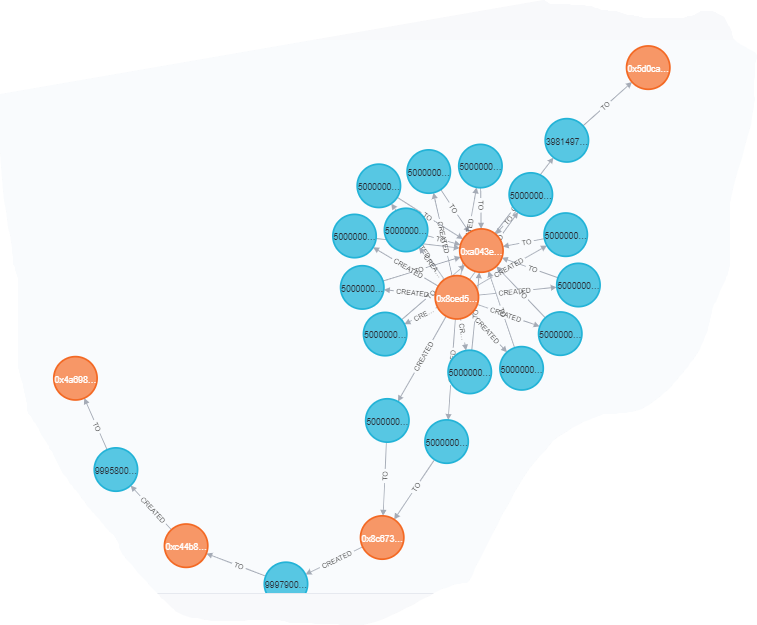

The origin of the funds in this Goerli Testnet Ethereum address 0x4A69805B898E6f05cC3b01a8E37e51A81d46C754 was confirmed to be 0x8c673E60b2d30D59F3CE7598CF4134d0EF9e773d. we can say that there was no anonymity techniques used in the transaction.